# Pandas basic
* https://pandas.pydata.org/
* https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
* 10 minutes to pandas
* https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

In [8]:
import pandas as pd

In [ ]:
# 공식문서(도움말) 활용하기
# pd.DataFrame?
# pd.DataFrame(shift + tab + tab)

pd.DataFrame?

### DataFrame
#### 2차원 자료구조

In [132]:
df = pd.DataFrame(
{
 "a" : [4, 5, 6, 4],
 "b" : [7, 8, 9, 9],
 "c" : [10, 11, 12, 10]
},
index = [1, 2, 3, 4]
)

df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12
4,4,9,10


### Series
#### 1차원 자료구조

In [26]:
# 변수["컬럼명"]
df["a"]

1    4
2    5
3    6
Name: a, dtype: int64

In [30]:
# Series -> Dataframe
# 변수[["컬럼명"]]

df[["a"]]

,a
1,4
2,5
3,6


### Subset

In [35]:
# 행 기준 데이터 출력
df[df["a"] > 4]

,a,b,c
2,5,8,11
3,6,9,12


In [37]:
df[["a", "b"]]

,a,b
1,4,7
2,5,8
3,6,9


### Summarize Data

In [47]:
# 빈도수
df["a"].value_counts()

a
4    2
5    1
6    1
Name: count, dtype: int64

In [51]:
len(df)

4

### Reshaping

#### sort_values, drop

In [61]:
# 특정 컬럼만 정렬
df["a"].sort_values()

1    4
4    4
2    5
3    6
Name: a, dtype: int64

In [65]:
# 특정 컬럼 기준 dataframe 전체 정렬
df.sort_values("a")

,a,b,c
1,4,7,10
4,4,9,10
2,5,8,11
3,6,9,12


In [124]:
# 역순 정렬
df.sort_values("a", ascending=False)

,a,b
3,6,9
2,5,8
1,4,7
4,4,9


In [136]:
# 특정 컬럼 기준 제거
# axis: 0(행, Row), 1(열, Column)
df = df.drop(["c"], axis=1)
df

,a,b
1,4,7
2,5,8
3,6,9
4,4,9


### Group Data
#### Groupby, pivot_table

In [88]:
# a 컬럼으로 그룹화하여 b 평균 값 조회
df.groupby(["a"])["b"].mean()

a
4    8.0
5    8.0
6    9.0
Name: b, dtype: float64

In [90]:
# a 컬럼으로 그룹화하여 b의 평균, 합계, 갯수 조회
df.groupby(["a"])["b"].agg(["mean", "sum", "count"])

,mean,sum,count
a,,,
4,8.0,16,2
5,8.0,8,1
6,9.0,9,1


In [92]:
# 데이터 요약
df.groupby(["a"])["b"].describe()

,count,mean,std,min,25%,50%,75%,max
a,,,,,,,,
4,2.0,8.0,1.414214,7.0,7.5,8.0,8.5,9.0
5,1.0,8.0,NaN,8.0,8.0,8.0,8.0,8.0
6,1.0,9.0,NaN,9.0,9.0,9.0,9.0,9.0


In [98]:
df

,a,b
1,4,7
2,5,8
3,6,9
4,4,9


In [96]:
# 그룹화 (a값이 4인 두 개의 b값은 평균으로 계산됨)
# pivot_table 속성값인 aggfunc은 'mean'가 default 값
pd.pivot_table(df, index="a")

,b
a,
4,8.0
5,8.0
6,9.0


In [100]:
pd.pivot_table(df, index="a", values="b")

,b
a,
4,8.0
5,8.0
6,9.0


In [104]:
# 그룹화하여 합계 구하기
pd.pivot_table(df, index="a", values="b", aggfunc="sum")

,b
a,
4,16
5,8
6,9


### Plotting
#### area / bar / barh / box / density / hexbin / hist / kde / line / pie

<Axes: >

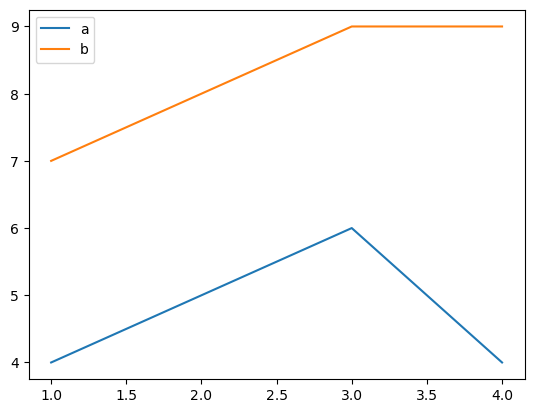

In [109]:
df.plot()

<Axes: >

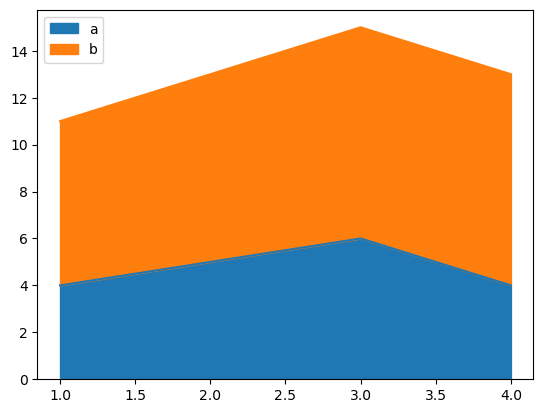

In [111]:
df.plot.area()

<Axes: >

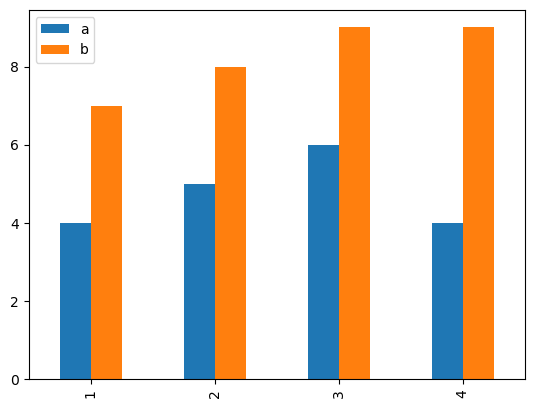

In [113]:
# 막대그래프
df.plot.bar()

<Axes: ylabel='Density'>

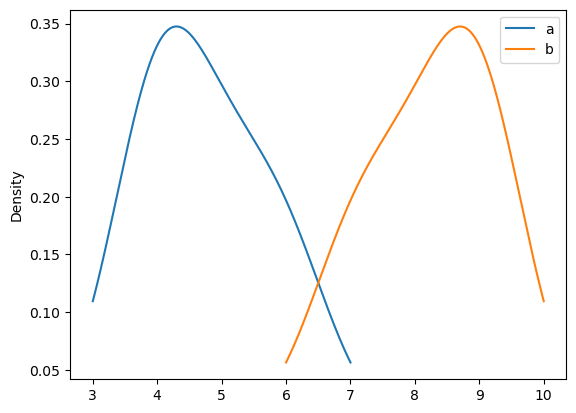

In [115]:
# 밀도 함수 그래프
df.plot.density()